### 📊 [강의 자료] 머신러닝 모델 평가 (Model Evaluation)

### 1. 개요 (Introduction)
모델 학습이 끝났다면, 이 모델이 새로운 데이터에 대해 얼마나 잘 예측하는지 확인해야 합니다. 단순히 "잘 맞는다"는 느낌이 아니라, 객관적인 지표를 통해 모델의 성능을 측정하는 것이 핵심입니다.

### 🧱 평가의 기본 원칙
* **데이터 분리**: 학습에 사용하지 않은 **테스트 데이터(Test Set)**로 평가해야 합니다.
* **일반화 성능**: 훈련 데이터에만 너무 맞춰진 과적합(Overfitting)을 방지하고, 처음 보는 데이터도 잘 맞추는지 확인하는 과정입니다.

---

### 2. 분류 모델 평가 지표 (Classification Metrics)
'예' 또는 '아니오'처럼 카테고리를 맞추는 모델의 평가 방법입니다.

### 🔹 오차 행렬 (Confusion Matrix)
예측값과 실제값이 어떻게 분포되어 있는지 보여주는 4가지 지표입니다.
* **TP (True Positive)**: 긍정(1)을 긍정으로 잘 맞춤
* **TN (True Negative)**: 부정(0)을 부정으로 잘 맞춤
* **FP (False Positive)**: 부정(0)인데 긍정(1)으로 잘못 예측 (1종 오류)
* **FN (False Negative)**: 긍정(1)인데 부정(0)으로 잘못 예측 (2종 오류)



### 🔹 핵심 지표들
1. **정확도 (Accuracy)**: 전체 데이터 중 맞춘 비율 ($\frac{TP+TN}{Total}$)
2. **정밀도 (Precision)**: 모델이 긍정이라고 한 것 중 실제 긍정인 비율 (**스팸 메일 차단** 등 FP가 중요할 때)
3. **재현율 (Recall)**: 실제 긍정인 것들 중 모델이 긍정으로 찾아낸 비율 (**암 진단** 등 FN이 중요할 때)
4. **F1-Score**: 정밀도와 재현율의 조화 평균 (두 지표가 균형을 이루는지 확인)

---

### 3. 회귀 모델 평가 지표 (Regression Metrics)
숫자(주가, 온도 등)를 예측하는 모델의 평가 방법입니다. 실제값과 예측값 사이의 '거리(오차)'를 측정합니다.

| 지표 | 설명 | 특징 |
| :--- | :--- | :--- |
| **MAE** | 오차 절대값의 평균 | 이상치에 영향을 덜 받음 |
| **MSE** | 오차 제곱의 평균 | 오차가 클수록 패널티가 커짐 |
| **RMSE** | MSE에 루트를 씌운 값 | 실제 데이터와 단위가 같아 해석이 쉬움 |
| **R² (결정계수)** | 모델의 설명력 (0~1) | 1에 가까울수록 성능이 좋음 |

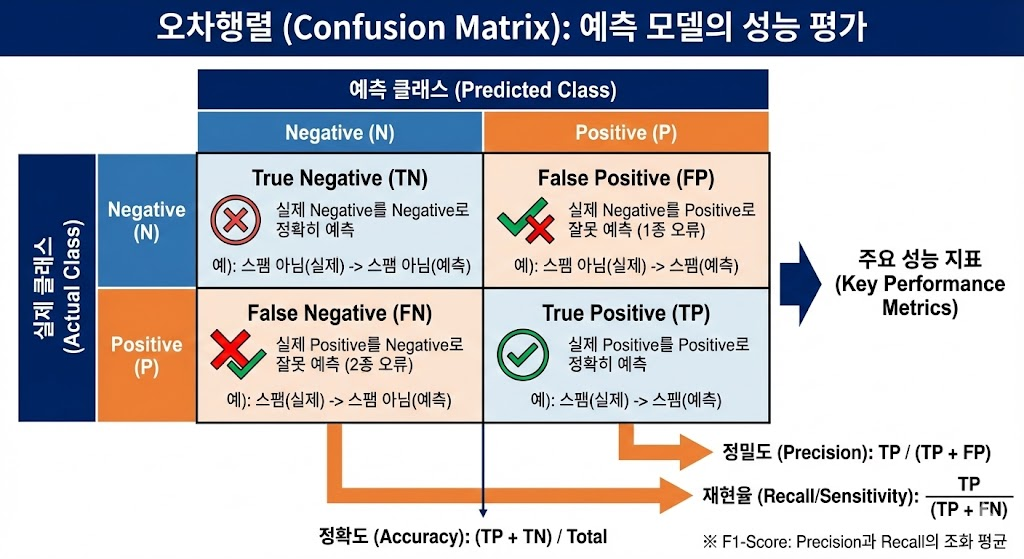

In [1]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# 1. 데이터 준비
# 0: 정상, 1: 암 환자 (Positive)
y_true = [0, 1, 1, 0, 0, 1, 1, 0, 1, 0]  # 실제 정답
y_pred = [0, 1, 0, 0, 0, 1, 1, 1, 1, 0]  # 모델의 예측

# 2. 혼동 행렬 (Confusion Matrix) 출력
# [[TN, FP],
#  [FN, TP]]
cm = confusion_matrix(y_true, y_pred)
print("=== 혼동 행렬 (Confusion Matrix) ===")
print(cm)
print("-" * 30)

# 3. 평가지표 계산
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred)
rec = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"정확도 (Accuracy)  : {acc:.2f}")   # 전체 중 맞춘 비율
print(f"정밀도 (Precision) : {prec:.2f}")  # 암이라고 예측한 것 중 진짜 암 환자
print(f"재현율 (Recall)    : {rec:.2f}")    # 실제 암 환자 중 찾아낸 비율
print(f"F1 Score           : {f1:.2f}")     # 정밀도와 재현율의 조화 평균

=== 혼동 행렬 (Confusion Matrix) ===
[[4 1]
 [1 4]]
------------------------------
정확도 (Accuracy)  : 0.80
정밀도 (Precision) : 0.80
재현율 (Recall)    : 0.80
F1 Score           : 0.80


In [ ]:
#모델이 전부 암이다라고 한경우
# 1. 데이터 준비
# 0: 정상, 1: 암 환자 (Positive)
y_true = [0, 1, 1, 0, 0, 1, 1, 0, 1, 0]  # 실제 정답
y_pred = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]  # 모델의 예측

# 2. 혼동 행렬 (Confusion Matrix) 출력
# [[TN, FP],
#  [FN, TP]]
cm = confusion_matrix(y_true, y_pred)
print("=== 혼동 행렬 (Confusion Matrix) ===")
print(cm)
print("-" * 30)

# 3. 평가지표 계산
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred)
rec = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"정확도 (Accuracy)  : {acc:.2f}")   # 전체 중 맞춘 비율
print(f"정밀도 (Precision) : {prec:.2f}")  # 암이라고 예측한 것 중 진짜 암 환자
print(f"재현율 (Recall)    : {rec:.2f}")    # 실제 암 환자 중 찾아낸 비율
print(f"F1 Score           : {f1:.2f}")     # 정밀도와 재현율의 조화 평균

=== 혼동 행렬 (Confusion Matrix) ===
[[5 0]
 [5 0]]
------------------------------
정확도 (Accuracy)  : 0.50
정밀도 (Precision) : 0.00
재현율 (Recall)    : 0.00
F1 Score           : 0.00


/Users/kimhanho/VSPRJ/wanted3/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [3]:
from sklearn.metrics import classification_report

y_true = [0, 1, 1, 0, 0, 1]
y_pred = [0, 1, 0, 0, 1, 1]

# 모든 지표를 표 형태로 깔끔하게 출력
print(classification_report(y_true, y_pred, target_names=['정상', '환자']))

              precision    recall  f1-score   support

          정상       0.67      0.67      0.67         3
          환자       0.67      0.67      0.67         3

    accuracy                           0.67         6
   macro avg       0.67      0.67      0.67         6
weighted avg       0.67      0.67      0.67         6

